# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [64]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
    
# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# Set up URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bf07decb51285129e7d8fc3985511c02&units=imperial&q='

In [60]:
# Set up lists to hold reponse info

existing_city=[]
city_errors=[]
lat = []
long = []
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
record_counter=0


print("Beginning Data Retrieval")
print("-"*20)
    
for city in cities:
    response=requests.get(query_url + city).json()

    
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        existing_city.append(city)
        record_counter=record_counter+1
        print(f"Processing Record {record_counter} | {city}")
        
    except KeyError:
        city_errors.append(city)
        print(f"**{city} not found. Skipping...**")
        


Beginning Data Retrieval
--------------------
Processing Record 1 | Rikitea
Processing Record 2 | Kapaa
**Bargal not found. Skipping...**
Processing Record 3 | Saldanha
Processing Record 4 | Clyde river
Processing Record 5 | Solnechnyy
Processing Record 6 | Grindavik
Processing Record 7 | Bluff
Processing Record 8 | Taber
Processing Record 9 | Road town
Processing Record 10 | Kodiak
Processing Record 11 | Aklavik
Processing Record 12 | Rio gallegos
Processing Record 13 | Kloulklubed
Processing Record 14 | Alyangula
Processing Record 15 | Hithadhoo
Processing Record 16 | Hermanus
Processing Record 17 | Iqaluit
**Nizhneyansk not found. Skipping...**
Processing Record 18 | Airai
Processing Record 19 | Nome
Processing Record 20 | Mataura
Processing Record 21 | Norman wells
Processing Record 22 | Khatanga
Processing Record 23 | Barrow
Processing Record 24 | Mayor pablo lagerenza
Processing Record 25 | Puerto ayora
Processing Record 26 | Tuatapere
**Toliary not found. Skipping...**
Processin

Processing Record 226 | Kihei
Processing Record 227 | Bengkulu
Processing Record 228 | Kavaratti
Processing Record 229 | Thompson
Processing Record 230 | Juneau
Processing Record 231 | Victoria
Processing Record 232 | Navalmoral de la mata
Processing Record 233 | Bathsheba
**San ignacio de sabaneta not found. Skipping...**
**Scottsburgh not found. Skipping...**
Processing Record 234 | Saint-philippe
Processing Record 235 | Manavalakurichi
Processing Record 236 | Labuhan
Processing Record 237 | Hegang
Processing Record 238 | Tacuati
Processing Record 239 | Saskylakh
Processing Record 240 | Caldas novas
Processing Record 241 | Lasa
Processing Record 242 | Vao
Processing Record 243 | Salalah
Processing Record 244 | Borisoglebskiy
Processing Record 245 | Jambi
Processing Record 246 | Namibe
**Mys shmidta not found. Skipping...**
Processing Record 247 | Udala
**Burica not found. Skipping...**
Processing Record 248 | Jaciara
Processing Record 249 | Valer
Processing Record 250 | Sola
Processi

Processing Record 447 | Oliveira do hospital
Processing Record 448 | Banyo
Processing Record 449 | Januaria
**Bokspits not found. Skipping...**
Processing Record 450 | Nelson bay
Processing Record 451 | Soderhamn
Processing Record 452 | Sekoma
Processing Record 453 | Mahdasht
**Keshan not found. Skipping...**
Processing Record 454 | Marsabit
Processing Record 455 | Shiyan
**Rolim de moura not found. Skipping...**
Processing Record 456 | Neyshabur
Processing Record 457 | Puerto penasco
Processing Record 458 | Chenzhou
Processing Record 459 | Alto paraguai
**Skagastrond not found. Skipping...**
Processing Record 460 | Jian
Processing Record 461 | Preobrazheniye
Processing Record 462 | Oranjemund
Processing Record 463 | San alberto
Processing Record 464 | Nata
Processing Record 465 | Galle
Processing Record 466 | Auki
**Vaitupu not found. Skipping...**
Processing Record 467 | Vinh
Processing Record 468 | Makaha
Processing Record 469 | Nikolayevsk-na-amure
Processing Record 470 | Moctezuma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": existing_city,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,70.63,71,4,9.89,PF,1627760159
1,Kapaa,22.0752,-159.3190,82.72,68,75,4.00,US,1627760159
2,Saldanha,-33.0117,17.9442,53.65,53,56,1.23,ZA,1627759980
3,Clyde river,70.4692,-68.5914,44.83,81,75,9.22,CA,1627760160
4,Solnechnyy,50.7214,136.6319,49.33,97,100,7.16,RU,1627760160


In [69]:
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,18.575139,17.922925,71.279010,69.161458,52.739583,8.304132,1.627760e+09
std,32.186256,92.057492,14.252959,22.079461,38.646423,5.961133,8.526493e+01
min,-54.800000,-175.200000,35.870000,10.000000,0.000000,0.000000,1.627760e+09
25%,-7.461150,-65.842700,60.910000,55.000000,13.750000,3.850000,1.627760e+09
50%,21.123300,23.627450,73.550000,74.000000,55.000000,6.860000,1.627760e+09
75%,44.967800,101.891400,80.925000,86.000000,92.000000,11.500000,1.627760e+09
max,78.218600,178.004200,106.500000,100.000000,100.000000,34.520000,1.627760e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [70]:
weather_df[weather_df["Humidity"].astype(float)>100]


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [56]:
#  Get the indices of cities that have humidity over 100%.

# no cities have humidity over 100. 

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

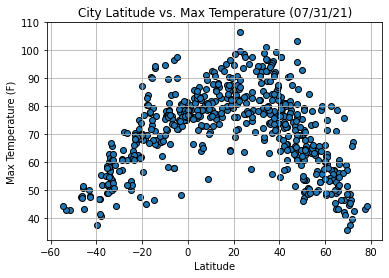

This plot is analyzing the current max temperatures at latitudes.
Temperatures appear to be higher as they get closer to latitude 20.
Temperatures decrease the further away they are from latitude 20 in either direction.


In [94]:
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

print("This plot is analyzing the current max temperatures at latitudes.")
print("Temperatures appear to be higher as they get closer to latitude 20.")
print("Temperatures decrease the further away they are from latitude 20 in either direction.")

## Latitude vs. Humidity Plot

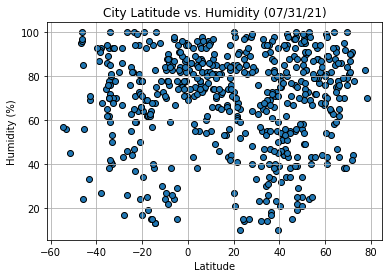

This plot is analyzing the current % of humidity at latitudes.
Humidity % exists across the board but appears to be more dense
at latitude 0.


In [95]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Humidity (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

print("This plot is analyzing the current % of humidity at latitudes.")
print("Humidity % exists across the board but appears to be more dense")
print("at latitude 0.")

## Latitude vs. Cloudiness Plot

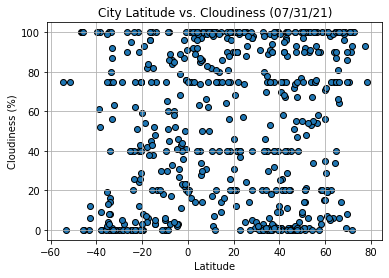

This plot is analyzing the current % of cloudiness at latitudes.
Cloudiness % appears to be more dense between latitude 0 and 25.


In [96]:
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

print("This plot is analyzing the current % of cloudiness at latitudes.")
print("Cloudiness % appears to be more dense between latitude 0 and 25.")

## Latitude vs. Wind Speed Plot

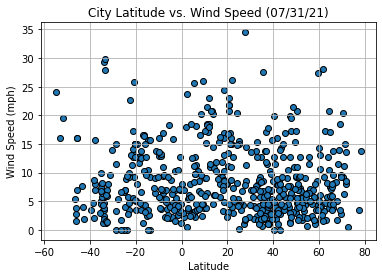

This plot is analyzing the current wind speed at latitudes.
Wind speed is mostly under 15mph but appears to increase more
the closer it is to latitudes 0 and 20.


In [97]:
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

print("This plot is analyzing the current wind speed at latitudes.")
print("Wind speed is mostly under 15mph but appears to increase more")
print("the closer it is to latitudes 0 and 20.")

## Linear Regression

The r-value is: 0.02771049087587083


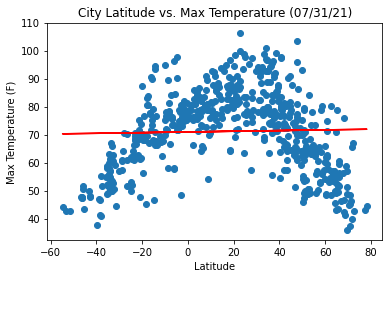

In [84]:
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")
plt.show()




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


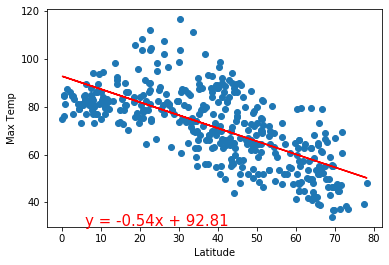

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


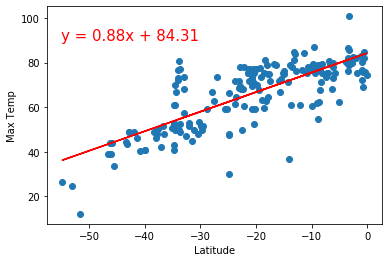

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


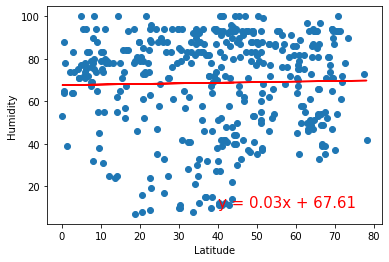

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


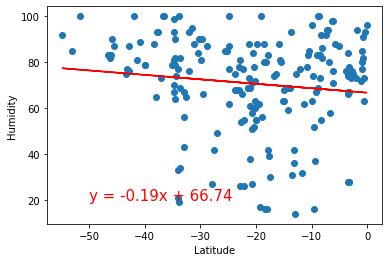

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


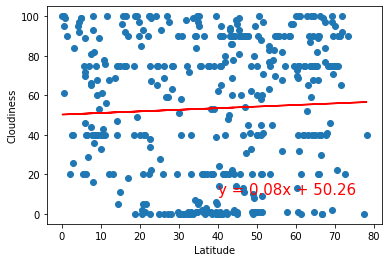

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


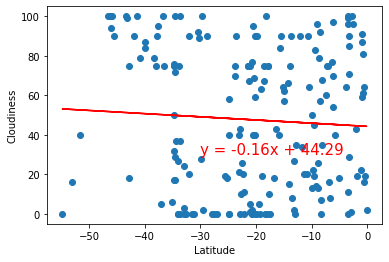

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


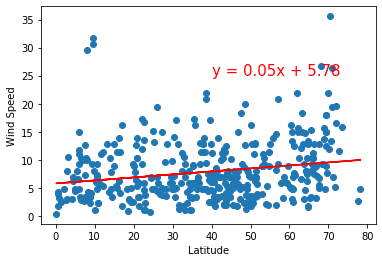

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


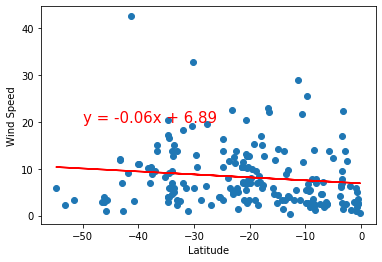